# Mapping Gridded Datasets

Many climate and meteorological datasets come as gridded rasters in data formats such as NetCDF and GRIB. XArray provides [Plotting Functions](https://xarray.pydata.org/en/stable/user-guide/plotting.html) based on Matplotlib. 

In this section, we will take the [Gridded Monthly Temperature Anomaly Data](https://data.giss.nasa.gov/gistemp/) from 1880-2020 from GISTEMP and visualize the temperature anomaly for the year 2021.

In [ ]:
import os
from matplotlib import pyplot as plt
import cartopy
import cartopy.crs as ccrs
import xarray as xr

In [ ]:
data_pkg_path = 'data'
file_path = os.path.join(data_pkg_path, 'gistemp','gistemp1200_GHCNv4_ERSSTv5.nc')

ds = xr.open_dataset(file_path)

The NetCDF file contains a grid of values for each month from 1880-2020. The `time` dimension has a length of 1704.

In [ ]:
ds

We can aggregate the data to yearly time-steps using the `resample()` method, reducing the `time` dimension.

In [ ]:
yearly = ds.resample(time='Y').mean()
yearly

We extract the `tempanomaly` variable and use the indexing method `isel()` to extract the latest time slice.

In [ ]:
anomaly = yearly['tempanomaly']
anomaly2021 = anomaly.isel(time=-1)

We can now plot this data using the `imshow()` method from xarray.

In [ ]:
from xarray.plot import imshow
imshow(anomaly2021)

To create more informative map visualization, we need to reproject this grid to another projection. CartoPy supports a wide range of projections and can plot them using matplotlib. CartoPy creates a [GeoAxes](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html) object and replaces the default `Axes` with it. This allows you to plot the data on a specified projection.

Reference: [CartoPy List of Projections](https://scitools.org.uk/cartopy/docs/latest/reference/crs.html?highlight=list#list-of-projections)

In [ ]:
ax = plt.axes(projection=ccrs.Orthographic(0, 40))
ax.coastlines()
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

We can create a GeoAxes with a custom Orthographic projection and plot the temperature anomaly data on it. The `transform` argument specifies the CRS of the original dataset.

In [ ]:
ax = plt.axes(projection=ccrs.Orthographic(0, 30))
ax.coastlines()
anomaly2021.plot.imshow(ax=ax,
    vmin=-4, vmax=4, cmap='coolwarm',
    transform=ccrs.PlateCarree())

fig = plt.gcf()
fig.set_size_inches(5,5)
plt.tight_layout()
plt.show()

We can further customize the map by adjusting the colorbar. 

Reference: [matplotlib.pyplot.colorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html)

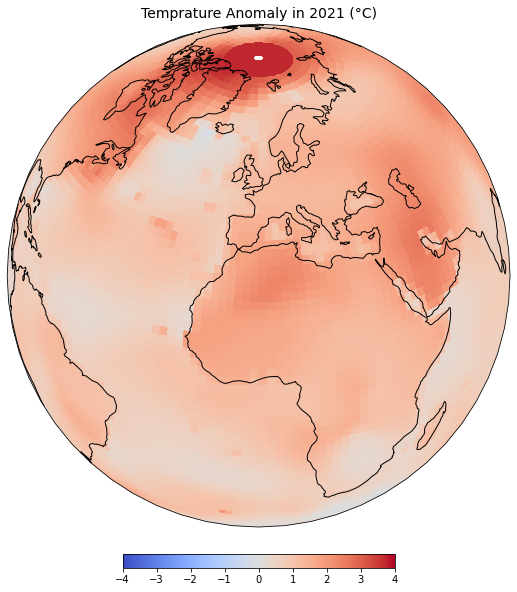

In [12]:
cbar_kwargs = {
    'orientation':'horizontal',
    'location': 'bottom',
    'fraction': 0.025,
    'pad': 0.05,
    'extend':'neither'
}

ax = plt.axes(projection=ccrs.Orthographic(0, 30))
ax.coastlines()
anomaly2021.plot.imshow(
    ax=ax,
    vmin=-4, vmax=4, cmap='coolwarm',
    transform=ccrs.PlateCarree(),
    add_labels=False,
    cbar_kwargs=cbar_kwargs)

fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Temprature Anomaly in 2021 (°C)', fontsize = 14)

output_folder = 'output'
output_path = os.path.join(output_folder, 'anomaly.jpg')
plt.savefig(output_path, dpi=300)
plt.show()

## Exercise

Display the map in an Equal Earth projection.